# **1. Import Libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score

# Import model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Import evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **2. Get dataset**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.
* Invoice id: Computer generated sales slip invoice identification number
* Branch: Branch of supercenter (3 branches are available identified by A, B and C).
* City: Location of supercenters
* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.(có sử dụng thẻ thành viên ko)
* Gender: Gender type of customer
* Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
* Unit price: Price of each product in $
* Quantity: Number of products purchased by customer
* Tax: 5% tax fee for customer buying
* Total: Total price including tax
* Date: Date of purchase (Record available from January 2019 to March 2019)
* Time: Purchase time (10am to 9pm)
* Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
* COGS: Cost of goods sold (giá vốn hàng bán)
* Gross margin percentage: Gross margin percentage
* Gross income: Gross income(thu nhập trước thuế)
* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Nếu chỉ số Gross margin cao chứng tỏ doanh nghiệp có khả năng tạo ra lợi nhuận cao từ hoạt động sản xuất, bán hàng. Ngược lại, nếu chỉ số này thấp thì doanh nghiệp sẽ gặp khó khăn trong việc tạo lợi nhuận và có thể cần phải tìm cách tăng giá bán hoặc giảm chi phí sản xuất để cải thiện lợi nhuận.
* Gross margin = Lợi nhuận gộp / Doanh thu thuần x 100%

Trong đó:

* Doanh thu thuần = Doanh thu bán hàng, cung cấp dịch vụ - các khoản giảm trừ
* Lợi nhuận gộp = Doanh thu thuần - Giá vốn sản phẩm đã bán
* ==> người có chỉ số Gross margin percentage càng cao thì càng có khả năng về kinh tế tốt hơn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = 'drive/MyDrive/Colab Notebooks/Inspire Lab/supermarket_sales - Sheet1.csv'
df = pd.read_csv(path)
display(df.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


>**Note:** Dễ dàng nhận ra quan hệ của một số feature
* cogs = Unit price * Quantity
* Tax 5% = 5% * cogs
* Total = cogs(giá vốn) + Tax 5% (thuế khách phải đóng)
* gross income = total * gross-margin-percentage/100
* ==> gross income = (Unit price * Quantity + 5% * Unit price * Quantity) * gross-margin-percentage/100

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
df.describe(include='object')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

>**Note:**
* Các feature kiểu number và object đều không thấy có dấu hiệu có missing data
* Các feature kiểu number có giá trị phân bố khá đều, gần như không bị lệnh (giá trị 0.5 quantile và mean chênh lệch nhau rất ít) trừ 2 feature `Total` và `cogs`.

# **3. Preprocessing Data**

>**Note:**
* Feature `Invoice ID` là không cần thiết.
* Feature `Date` đang có dtypes là `object`, cần đưa về kiểu `datetime` để có thể sử dụng linh hoạt hơn về sau
* Feature `Time` cho biết thời điểm khách hàng, tuy nhiên từng mốc thời gian chi tiết sẽ khó để quan sát, đưa về từng khung giờ như `Morning`, `Noon`, `Afternoon`... giúp dễ quan sát hơn
* Tại mỗi `City` chỉ có 1 `Branch` tương ứng, vì thế có thể gộp 2 feature này thành 1

In [7]:
def extrac_time(time):
  if time==0:
    return 'Midnight'
  if time==12:
    return 'Noon'
  if time>0 and time<12:
    return 'Morning'
  elif time>12 and time<18:
    return 'Afternoon'
  else:
    return 'Evening'

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Branch'] = df['Branch'].map({'A':'A-Yangon', 'B':'B-Mandalay', 'C':'C-Naypyitaw'})
df['Day Time'] = pd.to_datetime(df['Time']).dt.hour
df['Day Time'] = df['Day Time'].apply(extrac_time)
df = df.drop(['Invoice ID', 'City'], axis=1)
print(df.shape)
display(df.head())

(1000, 16)


,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day Time
0,A-Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon
1,C-Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Morning
2,A-Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Afternoon
3,A-Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Evening
4,A-Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Morning


>**Note:**
* Việc để thời gian mua sắm là 1 ngày cụ thể không giúp ích được nhiều, chuyển thành các ngày trong tuần sẽ giúp đánh giá khách hàng thích mua sắm vào các ngày nào trong tuần tốt hon.

In [9]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['Day_of_week'] = df['Date'].apply(lambda x: days[x.weekday()])
display(df.head())

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day Time,Day_of_week
0,A-Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon,Saturday
1,C-Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Morning,Friday
2,A-Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Afternoon,Sunday
3,A-Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Evening,Sunday
4,A-Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Morning,Friday


In [10]:
df = df.drop('Date', axis=1)

In [11]:
print(df.shape)
display(df.head())

(1000, 16)


,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day Time,Day_of_week
0,A-Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon,Saturday
1,C-Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Morning,Friday
2,A-Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Afternoon,Sunday
3,A-Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Evening,Sunday
4,A-Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Morning,Friday


# **4. EDA**

### **4.1 EDA with Visualization on Univariate**

In [12]:
print(df.columns)

Index(['Branch', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Day Time',
       'Day_of_week'],
      dtype='object')


In [13]:
Cat_feature = [col for col in df.columns if df[col].dtypes in ['object']]
Num_feature = [col for col in df.columns if df[col].dtypes in ['float64', 'int64']]
print('Categorical Feature: ',Cat_feature)
print('Numerical Feature:   ',Num_feature)

Categorical Feature:  ['Branch', 'Customer type', 'Gender', 'Product line', 'Time', 'Payment', 'Day Time', 'Day_of_week']
Numerical Feature:    ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


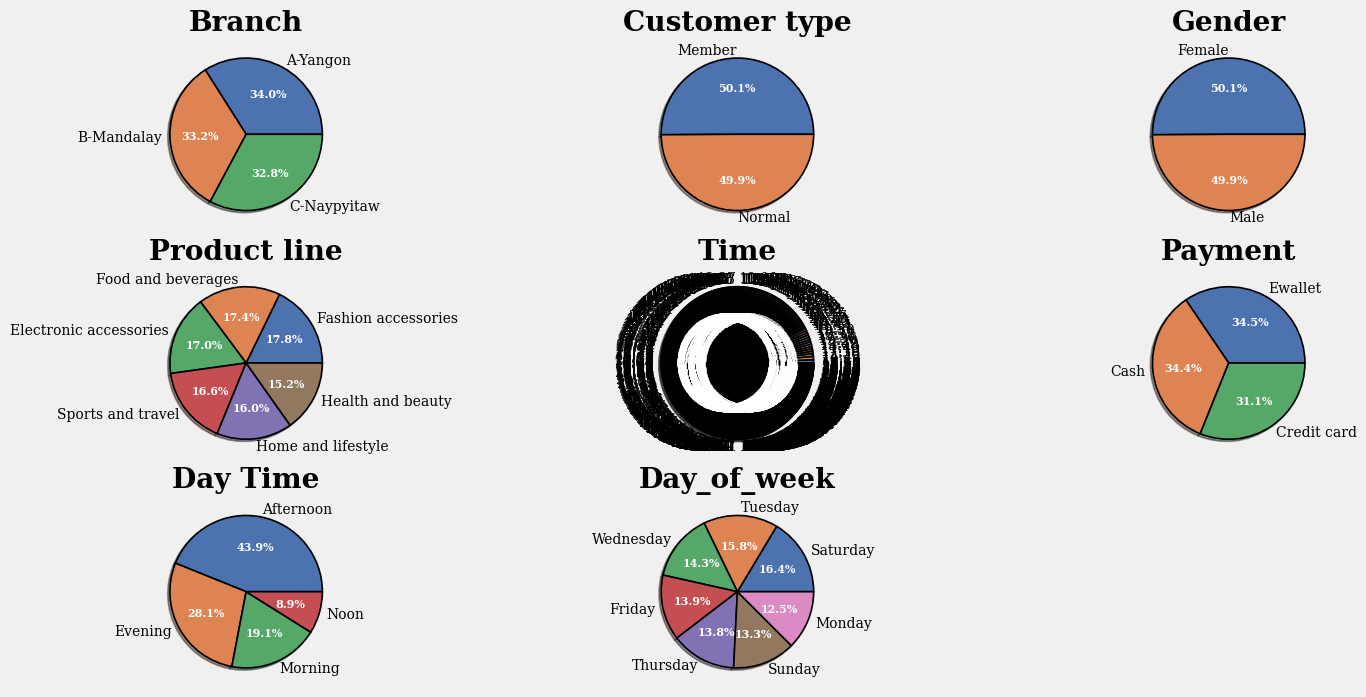

In [14]:
plt.style.use('fivethirtyeight')
palette = sns.color_palette('deep', 8)

fig, ax = plt.subplots(3, 3, figsize = (16, 8))
ax = ax.flatten()

for i, col in enumerate(Cat_feature):
  _, _, autotexts = ax[i].pie(df[col].value_counts(), labels = df[col].value_counts().index,
                                autopct='%1.1f%%', textprops = {'fontsize':10, 'fontfamily':'serif'},
                                shadow = True, wedgeprops = {'edgecolor':'black', 'lw':1.2}, colors = palette)
  for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_size(8)

  ax[i].set_title(col, fontweight = 'bold', fontfamily='serif')

for i in range(len(Cat_feature), len(ax)):
  fig.delaxes(ax[i])
plt.show()

>**Note:**
* Chỉ có `Day Time` là phân bố không đều, khách hàng có xu hướng mua sắm nhiều hơn vào buổi chiều và tối, buối trưa là thời điểm ít có người mua sắm nhất.

In [15]:
df['gross margin percentage'].value_counts()

4.761905    1000
Name: gross margin percentage, dtype: int64

>**Note:**
* Feature `gross margin percentage` là 1000 giá trị bằng nhau.
* ==> Có thể bỏ bớt feature này

In [16]:
df =  df.drop('gross margin percentage', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   Customer type  1000 non-null   object 
 2   Gender         1000 non-null   object 
 3   Product line   1000 non-null   object 
 4   Unit price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Tax 5%         1000 non-null   float64
 7   Total          1000 non-null   float64
 8   Time           1000 non-null   object 
 9   Payment        1000 non-null   object 
 10  cogs           1000 non-null   float64
 11  gross income   1000 non-null   float64
 12  Rating         1000 non-null   float64
 13  Day Time       1000 non-null   object 
 14  Day_of_week    1000 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 117.3+ KB


In [17]:
Num_feature = [col for col in df.columns if df[col].dtypes in ['float64', 'int64']]
print('Numerical Feature: ',Num_feature)

Numerical Feature:  ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']


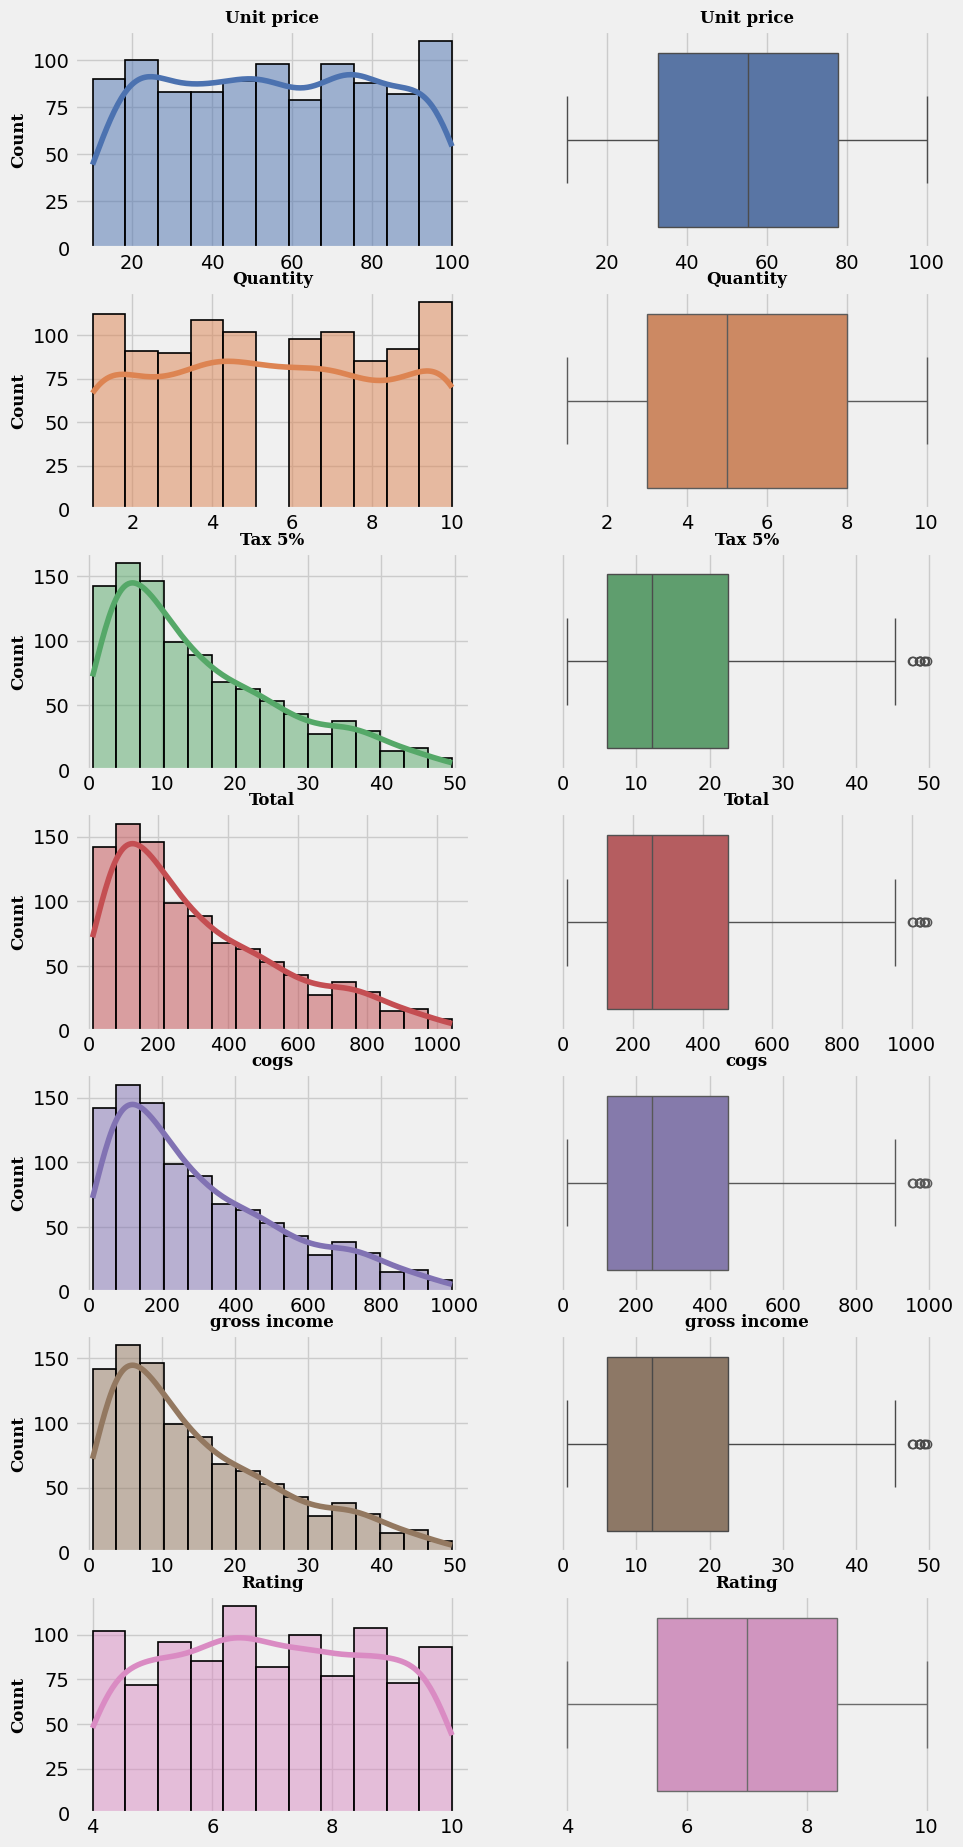

In [18]:
fig, ax = plt.subplots(7, 2, figsize = (10, 22))
ax = ax.flatten()
for i, col in enumerate(Num_feature):
  sns.histplot(x=col, data=df, ax=ax[2*i],
               color=palette[i], kde=True, lw=1.2, edgecolor='black')

  ax[2*i].set_title(col, fontweight='bold', fontfamily='serif', fontsize=12)
  ax[2*i].set_xlabel('')
  ax[2*i].set_ylabel('Count', fontweight='bold', fontfamily='serif', fontsize=12)

  sns.boxplot(x=col, data=df, ax=ax[2*i+1], color=palette[i])

  ax[2*i+1].set_title(col, fontweight='bold', fontfamily='serif', fontsize=12)
  ax[2*i+1].set_xlabel('')
  ax[2*i+1].set_ylabel('')

plt.show()

* cogs(giá vốn) + Tax 5% (thuế khách phải đóng) = Total
* Unit price * Quantity = cogs
* Tax 5% = 5% * cogs
* gross income = total * gross-margin-percentage/100

>**Note:**
* `Unit price` và `Quantity` phân bố tương tự nhau và không có outlier ==> Khách hàng mua sắm theo thói quen, không có đột biến như khách hàng đột nhiên mua hàng đắt tiền hơn hẳn hoặc mua với số lượng lớn hẳn so với bình thường.
* `Tax 5%`, `Total`, `cogs`, `gross income` có dạng giống nhau và có chứa 1 số ít outlier.

### **4.2 MultiVariate Analysis**

In [19]:
def setup_graph_legend(legend_title, x_label, y_label, graph_title):
  # Setup lengend
  plt.legend(fontsize=12, title=legend_title, loc='upper right',
              shadow=True, frameon=True, title_fontproperties={'weight':'bold', 'size':'20', 'family':'serif'})

  plt.xlabel(x_label, fontsize=16, fontweight='bold', fontfamily='serif', labelpad=15)
  plt.ylabel(y_label, fontsize=16, fontweight='bold', fontfamily='serif', labelpad=15)
  plt.title(graph_title, fontsize=20, fontweight='bold', fontfamily='serif')

  plt.xticks(fontsize=15, fontfamily='serif')
  plt.yticks(fontsize=15, fontfamily='serif')

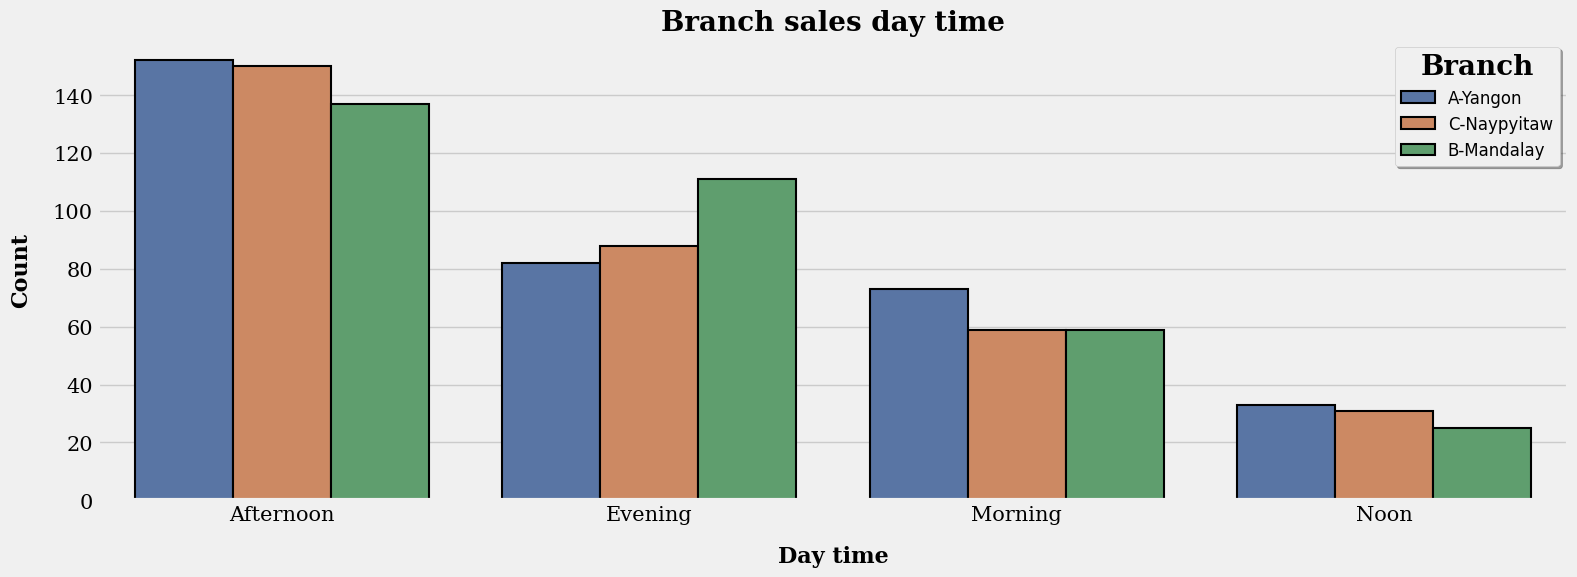

In [20]:
plt.figure(figsize=(16, 6))
sns.countplot(x = 'Day Time', data = df, palette = palette,
              edgecolor = 'black', linewidth = 1.5, hue='Branch',
              order = df['Day Time'].value_counts().index)

setup_graph_legend('Branch', 'Day time', 'Count', 'Branch sales day time')

plt.tight_layout()
plt.show()

>**Note:**
* Ở cả 3 siêu thị thời gian từ buổi chiều đến tối là thời gian có lượng khách hàng mua sắm nhiều nhất trong ngày.

In [21]:
def setup_graph(x_label, y_label, graph_title):
  plt.xlabel(x_label, fontsize=15, fontweight='bold', fontfamily='serif', labelpad=15)
  plt.ylabel(y_label, fontsize=15, fontweight='bold', fontfamily='serif', labelpad=15)
  plt.title(graph_title, fontsize=20, fontweight = 'bold', fontfamily = 'serif')

  plt.xticks(fontsize=15, fontfamily='serif')
  plt.yticks(fontsize=15, fontfamily='serif')

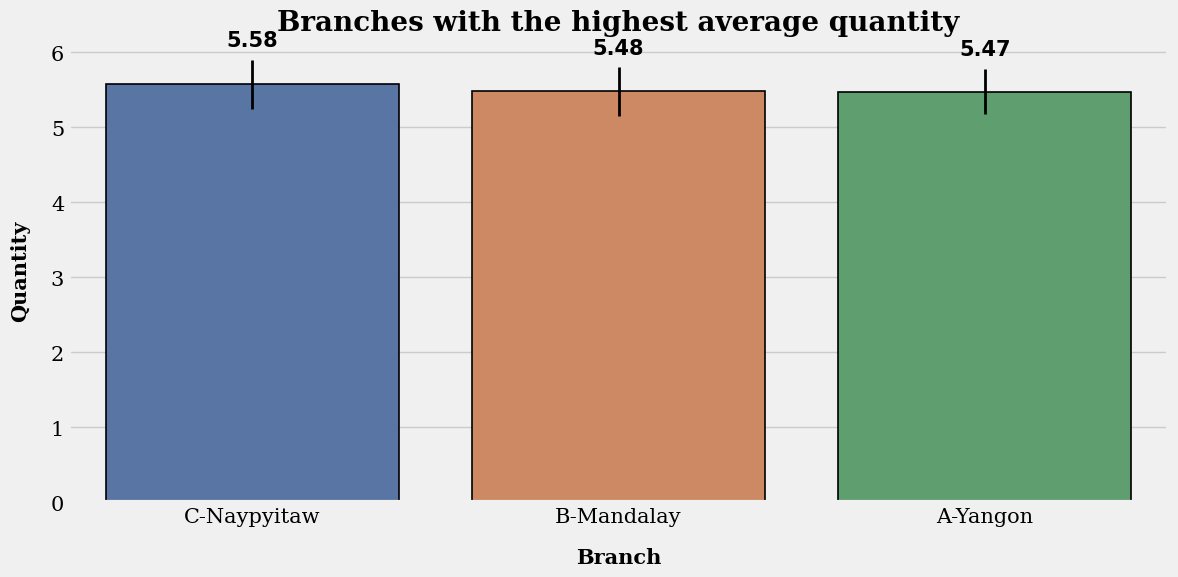

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x ='Branch', y='Quantity', data=df, palette=palette,
            order=df.groupby('Branch')['Quantity'].mean().sort_values(ascending = False).index,
            edgecolor ='black', errcolor ='black', errwidth=2, lw=1.2)

for i in range(3):
  plt.text(i, df.groupby('Branch')['Quantity'].mean().sort_values(ascending=False)[i]+0.5,
            round(df.groupby('Branch')['Quantity'].mean().sort_values(ascending = False)[i], 2),
            ha='center', fontdict={'weight':'bold', 'size':15}, color='black')


setup_graph('Branch', 'Quantity', 'Branches with the highest average quantity')

plt.tight_layout()
plt.show()

>**Note:**
* Siêu thị A có trung bình số lượng sản phẩm bán ra nhỉnh hơn 1 lượng rất nhỏ so với 2 siêu thị còn lại

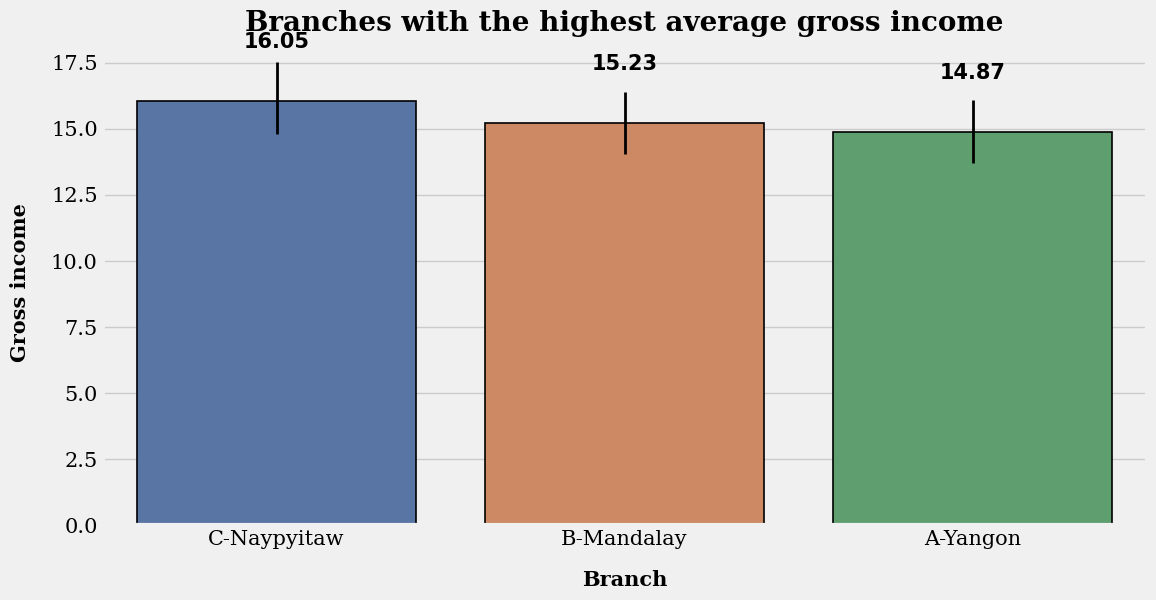

In [23]:
plt.figure(figsize=(12, 6))

sns.barplot(x='Branch', y='gross income', data=df, palette=palette,
            order=df.groupby('Branch')['gross income'].mean().sort_values(ascending = False).index,
            edgecolor='black', errcolor='black', errwidth=2, lw=1.2)

for i in range(3):
    plt.text(i, df.groupby('Branch')['gross income'].mean().sort_values(ascending = False)[i]+2,
             round(df.groupby('Branch')['gross income'].mean().sort_values(ascending = False)[i],2),
             ha='center', fontdict={'weight':'bold', 'size':15}, color='black')

setup_graph('Branch', 'Gross income', 'Branches with the highest average gross income')
plt.show()

>**Note:**
* Siêu thị A có trung bình doanh thu nhỉnh hơn so với 2 siêu thị còn lại

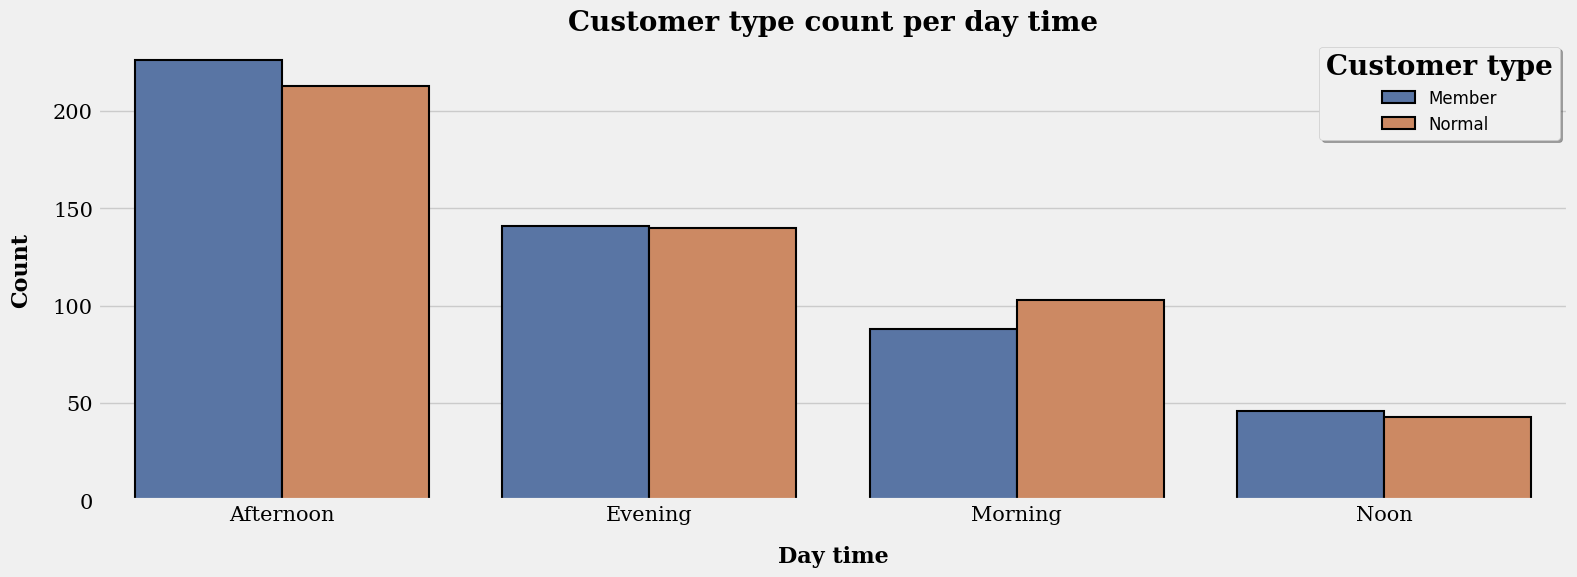

In [24]:
plt.figure(figsize=(16, 6))

sns.countplot(x='Day Time', data=df, hue='Customer type', palette=palette,
                edgecolor='black', lw=1.5, order = df['Day Time'].value_counts().index)

setup_graph_legend('Customer type', 'Day time', 'Count', 'Customer type count per day time')

plt.tight_layout()
plt.show()

>**Note:**
* Số lượng khách hàng `Member` và số lượng khách hàng `Normal` đến mua sắm gần như nhau.

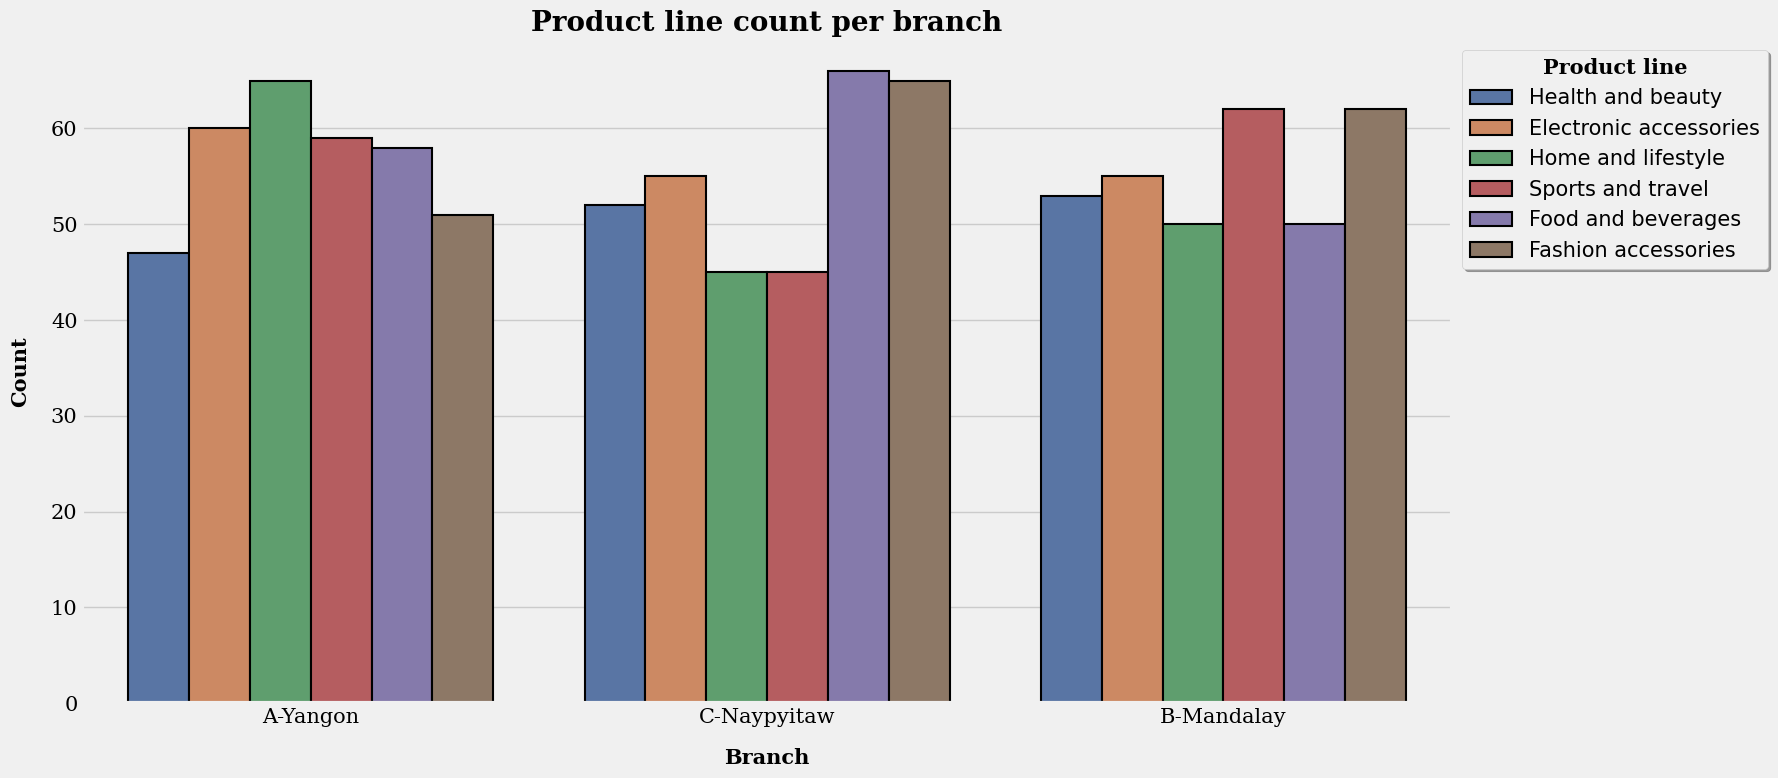

In [25]:
plt.figure(figsize=(18, 8))
sns.countplot(x='Branch', data=df, palette=palette,
              hue='Product line', lw=1.5, edgecolor='black')

setup_graph('Branch', 'Count', 'Product line count per branch')

plt.legend(fontsize=15, title='Product line', bbox_to_anchor=(1, 1), loc='upper left',
            shadow=True, frameon=True, title_fontproperties={'weight':'bold', 'size':'15', 'family':'serif'})

plt.tight_layout()
plt.show()

>**Note:**
* Ở mỗi thành phố nhu cầu mua sắm của khách hàng về từng dòng sản phẩm là khác nhau.
* Ở A người dân có nhu cầu nhiều hơn về các sản phẩm sử dụng hàng ngày trong cuộc sống hơn so với các dòng sản phẩm khác.
* Ở B người dân có nhu cầu ăn uống và quan tâm đến thời trang nhiều hơn.
* Ở C người dân có nhu cầu về thể thao, du lịch và thời trang nhiều hơn.

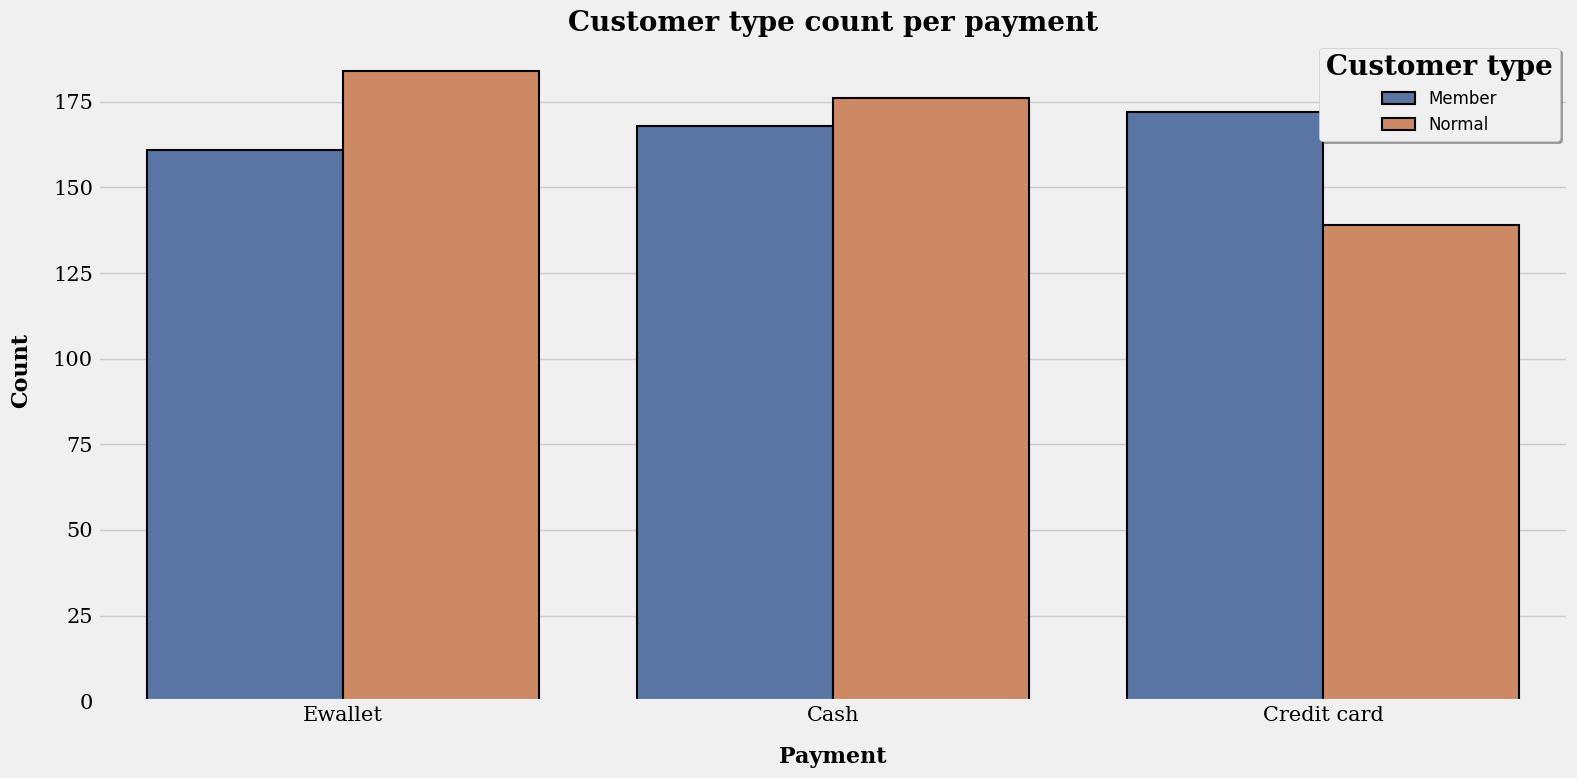

In [26]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Payment', data=df, palette=palette,
              hue='Customer type', lw=1.5, edgecolor='black')

setup_graph_legend('Customer type', 'Payment', 'Count', 'Customer type count per payment')

plt.tight_layout()
plt.show()

>**Note:**
* Với khách hàng thành viên, thanh toán bằng `credit card` được ưa chuộng nhất.
* Với khách hàng bình thường, thanh toán bằng `Ewallet` được ưa chuộng nhất.

In [27]:
df['Day_of_week'].value_counts()

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: Day_of_week, dtype: int64

In [28]:
df.groupby('Branch')['Day_of_week'].value_counts()

Branch       Day_of_week
A-Yangon     Sunday         52
             Tuesday        51
             Friday         50
             Saturday       50
             Monday         48
             Thursday       46
             Wednesday      43
B-Mandalay   Saturday       60
             Tuesday        53
             Friday         51
             Wednesday      50
             Thursday       44
             Monday         39
             Sunday         35
C-Naypyitaw  Saturday       54
             Tuesday        54
             Wednesday      50
             Thursday       48
             Sunday         46
             Friday         38
             Monday         38
Name: Day_of_week, dtype: int64

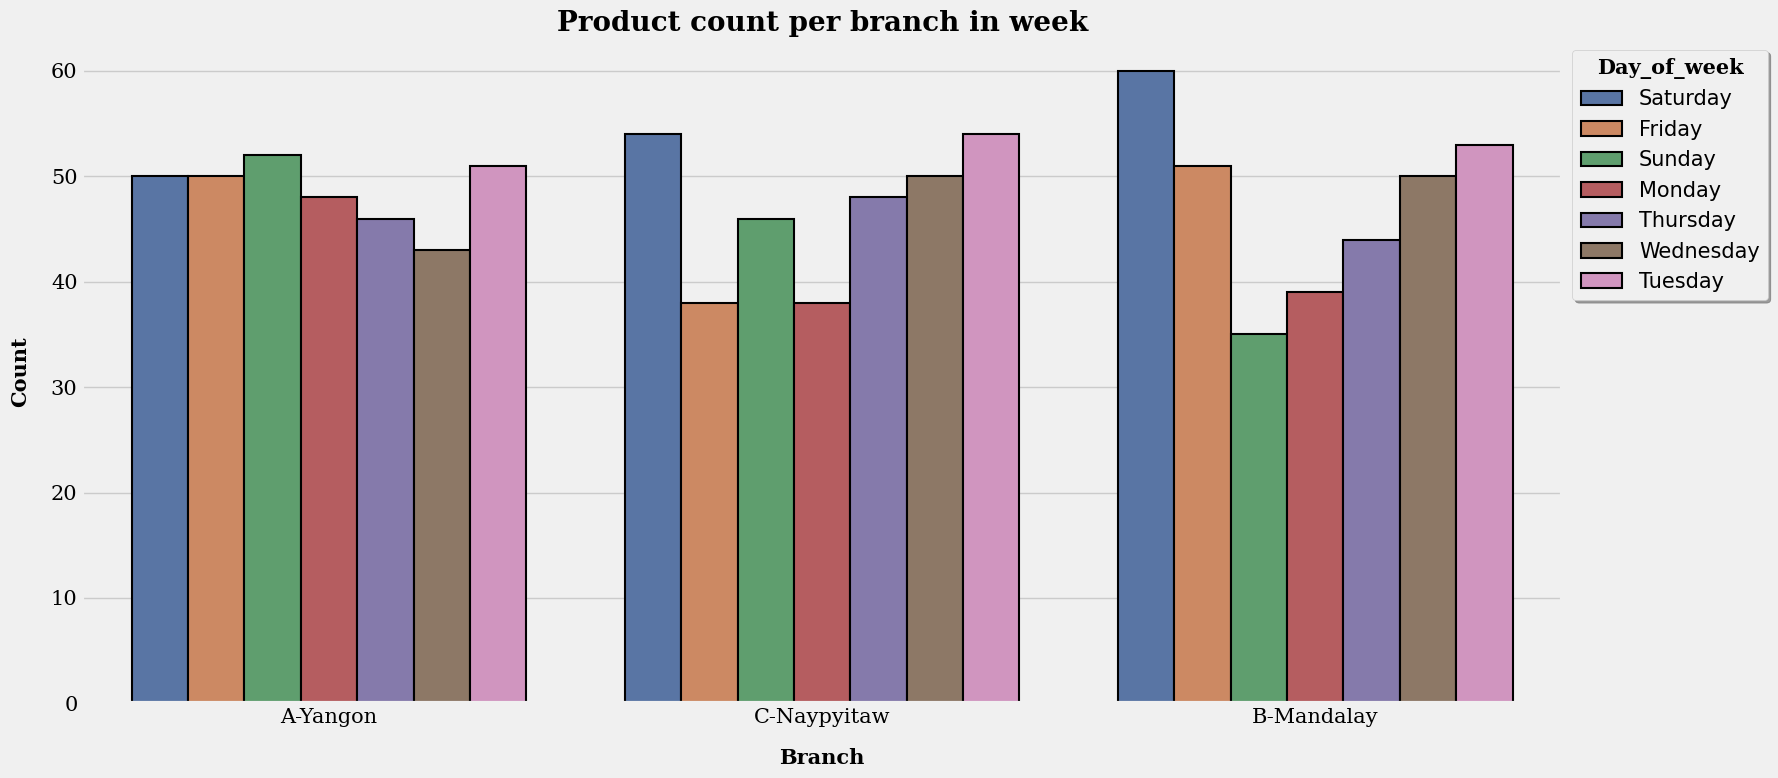

In [29]:
plt.figure(figsize=(18, 8))
sns.countplot(x='Branch', data=df, palette=palette,
              hue='Day_of_week', lw=1.5, edgecolor='black')

setup_graph('Branch', 'Count', 'Product count per branch in week')

plt.legend(fontsize=15, title='Day_of_week', bbox_to_anchor=(1, 1), loc='upper left',
            shadow=True, frameon=True, title_fontproperties={'weight':'bold', 'size':'15', 'family':'serif'})

plt.tight_layout()
plt.show()

>**Note:**
* Số lượng lượt mua sắm tại mỗi siêu thị tại mỗi ngày trong tuần không chênh lệch nhau nhiều.
* Người dân thành phố A mua sắm ngày chủ nhật nhỉnh hơn so với các ngày trong tuần, với thành phố C người dân lại mua sắm nhiều hơn vào thứ 7 và thứ 3, còn thành phố B người dân lại mua sắm mạnh vào thứ 7

In [30]:
df.groupby('Branch')['Unit price'].mean()

Branch
A-Yangon       54.780853
B-Mandalay     55.659277
C-Naypyitaw    56.609024
Name: Unit price, dtype: float64

In [31]:
min_unit_price = np.min(df['Unit price'])
max_unit_price = np.max(df['Unit price'])
unit = (max_unit_price-min_unit_price)/3

def extrac_unit_price(unit_price):
  if unit_price>=min_unit_price and unit_price<(min_unit_price+unit):
    return 'Giá thấp'
  if unit_price>=(min_unit_price+unit) and unit_price<(min_unit_price+2*unit):
    return 'Giá TB'
  if unit_price>=(min_unit_price+2*unit) and unit_price<=max_unit_price:
    return 'Giá Cao'

In [32]:
df['Loại sp'] = df['Unit price'].apply(extrac_unit_price)
df.groupby('Day Time')['Loại sp'].value_counts()

Day Time   Loại sp 
Afternoon  Giá Cao     158
           Giá TB      144
           Giá thấp    137
Evening    Giá thấp    100
           Giá Cao      98
           Giá TB       83
Morning    Giá Cao      73
           Giá TB       59
           Giá thấp     59
Noon       Giá thấp     36
           Giá TB       30
           Giá Cao      23
Name: Loại sp, dtype: int64

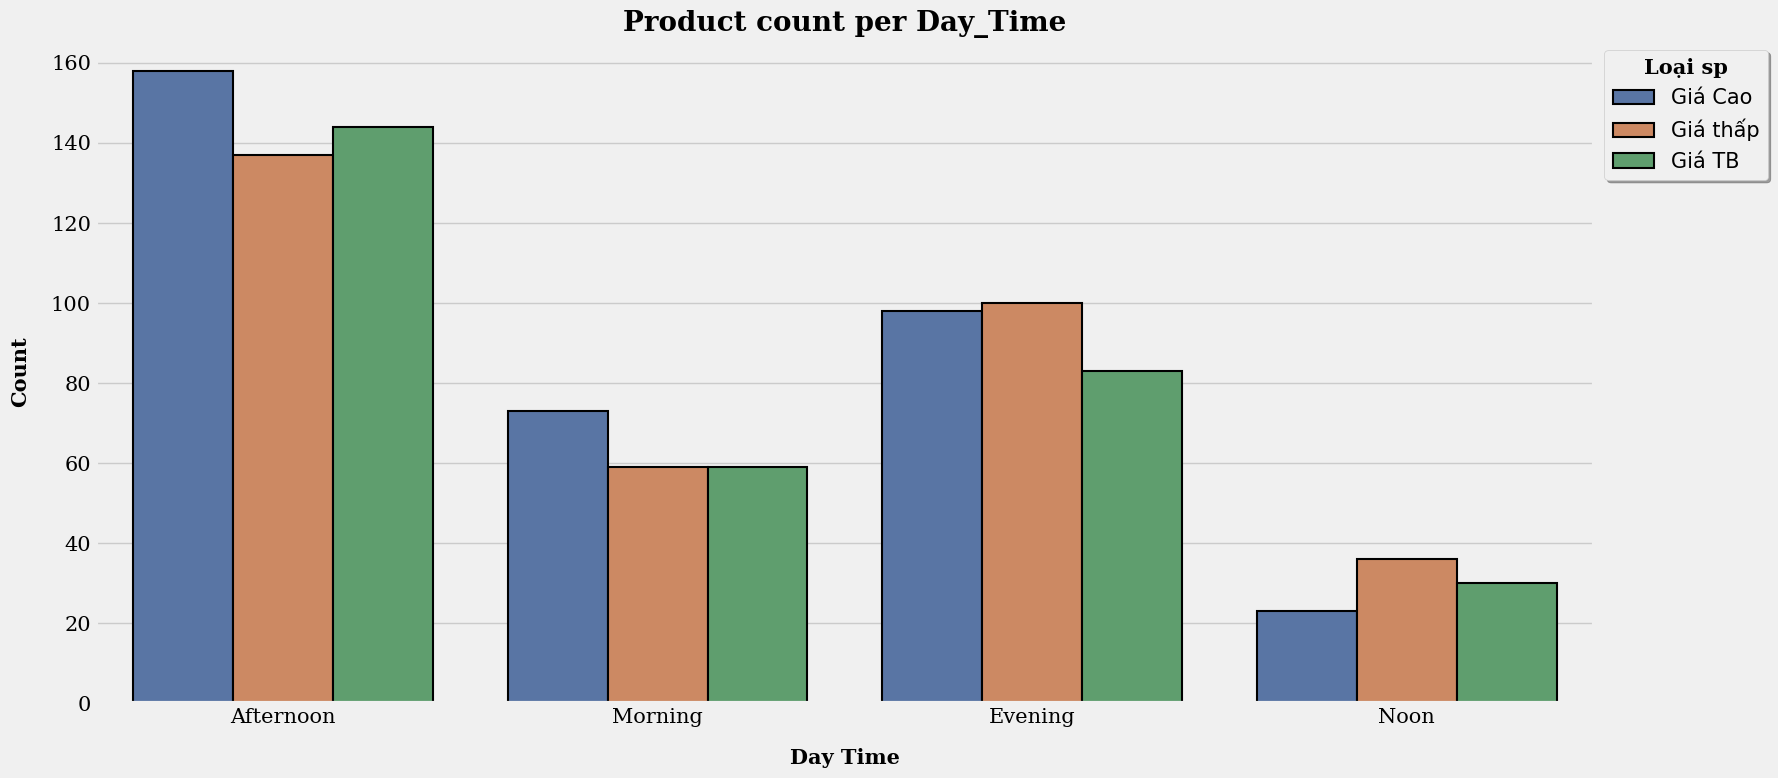

In [33]:
plt.figure(figsize=(18, 8))
sns.countplot(x='Day Time', data=df, palette=palette,
              hue='Loại sp', lw=1.5, edgecolor='black')

setup_graph('Day Time', 'Count', 'Product count per Day_Time')

plt.legend(fontsize=15, title='Loại sp', bbox_to_anchor=(1, 1), loc='upper left',
            shadow=True, frameon=True, title_fontproperties={'weight':'bold', 'size':'15', 'family':'serif'})

plt.tight_layout()
plt.show()

>**Note:**
* Số lượng sản phẩm có giá từ khoảng 70 đến ~100$ được tiêu thụ không chênh lệch đáng kể với các sản phẩm có giá thấp hơn
* Trong ngày các sản phẩm giá cao thường được khách hàng mua vào buổi chiều và buổi tối

In [34]:
df.groupby('Branch')['Loại sp'].value_counts()

Branch       Loại sp 
A-Yangon     Giá Cao     115
             Giá thấp    114
             Giá TB      111
B-Mandalay   Giá Cao     115
             Giá thấp    112
             Giá TB      105
C-Naypyitaw  Giá Cao     122
             Giá thấp    106
             Giá TB      100
Name: Loại sp, dtype: int64

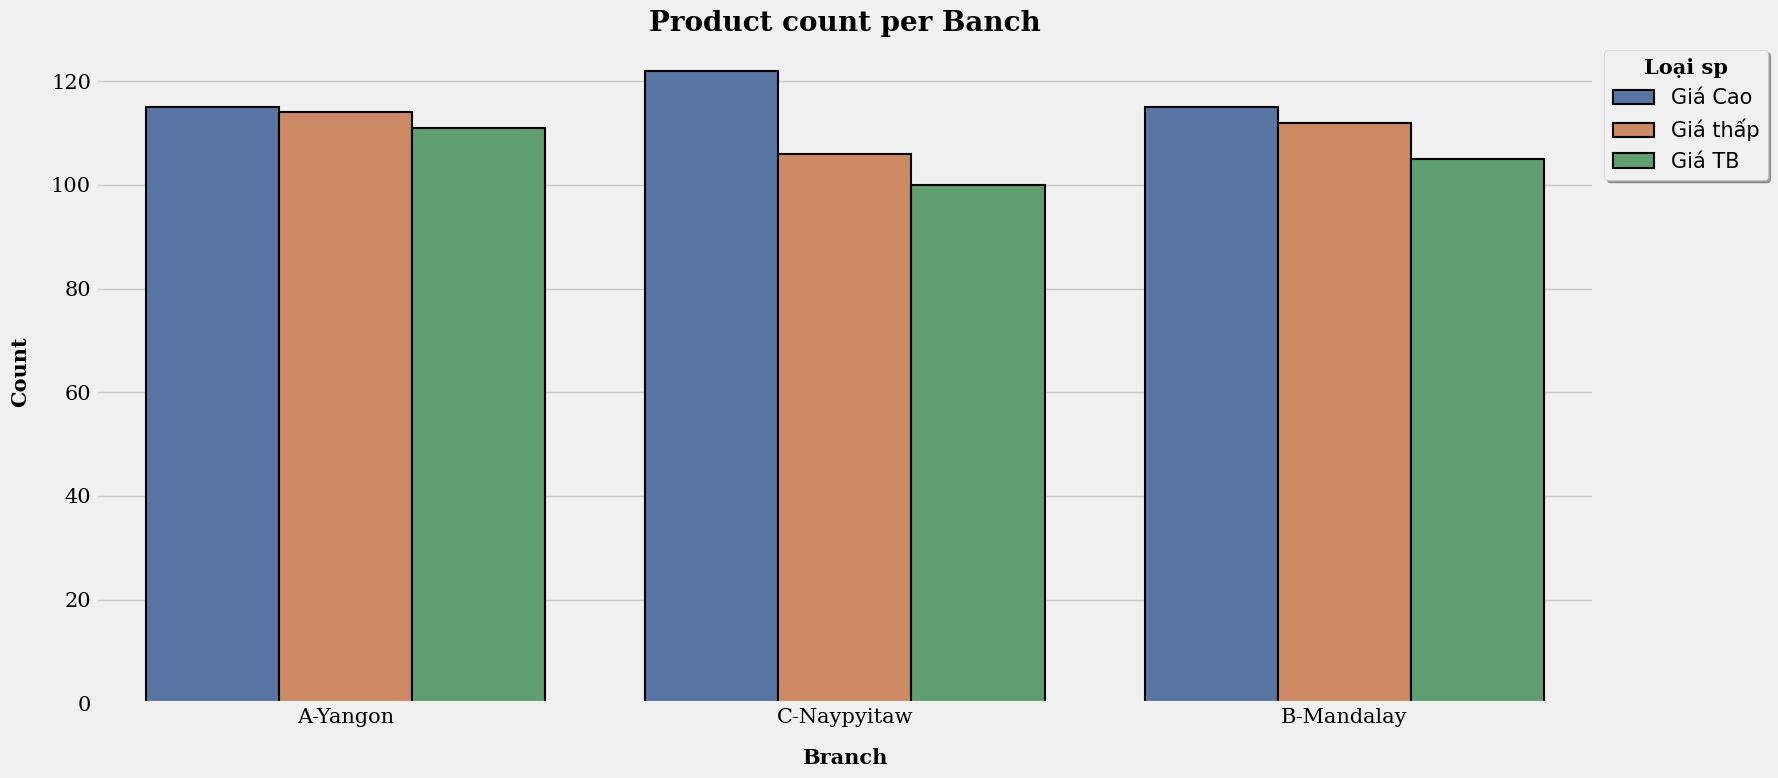

In [35]:
plt.figure(figsize=(18, 8))
sns.countplot(x='Branch', data=df, palette=palette,
              hue='Loại sp', lw=1.5, edgecolor='black')

setup_graph('Branch', 'Count', 'Product count per Banch')

plt.legend(fontsize=15, title='Loại sp', bbox_to_anchor=(1, 1), loc='upper left',
            shadow=True, frameon=True, title_fontproperties={'weight':'bold', 'size':'15', 'family':'serif'})

plt.tight_layout()
plt.show()

>**Note:**
* Các dòng sản phẩm bán ra ở 3 mức giá tại mỗi siêu thị cũng tương đồng nhau, phần chênh lệch không lớn.

<Axes: xlabel='Total', ylabel='Quantity'>

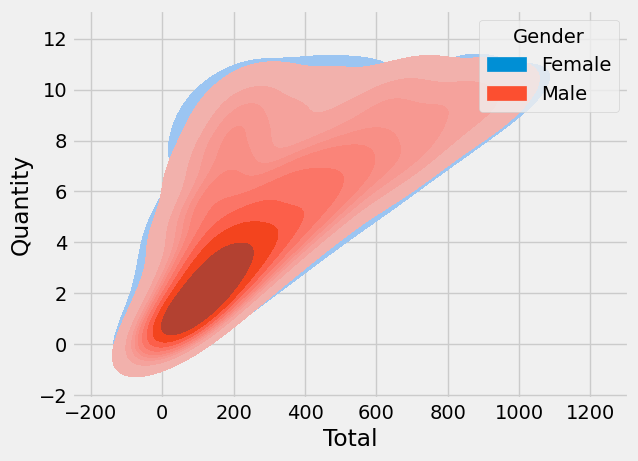

In [37]:
sns.kdeplot(data=df, x='Total', y='Quantity', hue='Gender', fill=True)

>**Note:**
* Khách hàng nam và nữ sử dụng số tiền mua sắm gần như ngang bằng nhau.

# **5. Feature Engineering**
* Feature Enrichment, Feature Transformation, Feature Selection, Feature Encoding, Feature Scaling (Normalization & Standardization)

### **5.1 Feature Selection**

In [45]:
df = df.drop(['Loại sp', 'Time'], axis=1)
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


>**Note:** Dễ dàng nhận ra các quan hệ tuyến tính
* cogs(giá vốn) + Tax 5% (thuế khách phải đóng) = Total
* Unit price * Quantity = cogs
* Tax 5% = 5% * cogs
* gross income = total * gross-margin-percentage/100
* Để dự đoán gross income cần loại bỏ các feature ['Tax 5%', 'Total', 'cogs']

In [46]:
df1 = df.copy()
df1 = df1.drop(['Tax 5%', 'gross income', 'cogs'], axis=1)
display(df1.head())

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,Rating,Day Time,Day_of_week
0,A-Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,9.1,Afternoon,Saturday
1,C-Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,9.6,Morning,Friday
2,A-Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card,7.4,Afternoon,Sunday
3,A-Yangon,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet,8.4,Evening,Sunday
4,A-Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet,5.3,Morning,Friday


In [47]:
df1.corr()

,Unit price,Quantity,Total,Rating
Unit price,1.000000,0.010778,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,-0.015815
Total,0.633962,0.705510,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,1.000000


### **5.2 Feature Encoding**

In [48]:
df1 = df1.apply(lambda x: x.astype('category') if x.dtype=='object' else x)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Branch         1000 non-null   category
 1   Customer type  1000 non-null   category
 2   Gender         1000 non-null   category
 3   Product line   1000 non-null   category
 4   Unit price     1000 non-null   float64 
 5   Quantity       1000 non-null   int64   
 6   Total          1000 non-null   float64 
 7   Payment        1000 non-null   category
 8   Rating         1000 non-null   float64 
 9   Day Time       1000 non-null   category
 10  Day_of_week    1000 non-null   category
dtypes: category(7), float64(3), int64(1)
memory usage: 39.5 KB


In [50]:
Cat_feature_df1 = [col for col in df1.columns if df1[col].dtypes in ['category']]
print(Cat_feature_df1)

['Branch', 'Customer type', 'Gender', 'Product line', 'Payment', 'Day Time', 'Day_of_week']


In [51]:
# mã hóa các object feature thành number feature
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for feature in Cat_feature_df1:
  df1[feature] = oe.fit_transform(df1[col].values.reshape(-1, 1))
display(df1.head())

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,Rating,Day Time,Day_of_week
0,51.0,51.0,51.0,51.0,74.69,7,548.9715,51.0,9.1,51.0,51.0
1,56.0,56.0,56.0,56.0,15.28,5,80.2200,56.0,9.6,56.0,56.0
2,34.0,34.0,34.0,34.0,46.33,7,340.5255,34.0,7.4,34.0,34.0
3,44.0,44.0,44.0,44.0,58.22,8,489.0480,44.0,8.4,44.0,44.0
4,13.0,13.0,13.0,13.0,86.31,7,634.3785,13.0,5.3,13.0,13.0


### **5.3 Train, test split**

In [52]:
# Chia train set, test set
X = df1.drop('Total', axis=1)
y = df1['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 10)
(800,)
(200, 10)
(200,)


### **5.4 Feature Transformation**

In [53]:
# standard Scale các feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

# **6. Model Building**

In [54]:
models=[KNeighborsRegressor(), LinearRegression(), Lasso(), Ridge(), ElasticNet(), DecisionTreeRegressor(),
       RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), XGBRegressor()]

names=['KNeighborsRegressor', 'LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'DecisionTreeRegressor',
       'RandomForestRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor', 'XGBRegressor']

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [56]:
def createmodels(model_list, independent, dependent, model_name):

  xtrain, xtest, ytrain, ytest=train_test_split(independent, dependent, test_size=0.2, random_state=95)
  sc = StandardScaler()
  xtrain = sc.fit_transform(xtrain)
  xtest = sc.transform(xtest)

  name = []
  meanabs = []
  meansqd = []
  rootmeansqd = []
  r2 = []
  mcv = []

  # Lần lượt train các model bằng (xtrain, ytrain) và truyền xtest vào để cho ra kết quả dự đoán
  for i, model in enumerate(model_list):
      model.fit(xtrain, ytrain)
      pred = model.predict(xtest)

      # Sử dụng cross validation
      score = cross_val_score(model, independent, dependent, cv=10)
      # Các chỉ số đánh giá từng model
      name.append(model_name[i])
      meanabs.append(np.round(mean_absolute_error(pred, ytest), 4))
      meansqd.append(np.round(mean_squared_error(pred, ytest), 4))
      rootmeansqd.append(np.round(np.sqrt(mean_squared_error(pred, ytest)), 4))
      r2.append(np.round(r2_score(pred, ytest), 4)*100)
      mcv.append(np.round(np.mean(score), 4)*100)

  # Creating Dataframe
  data = pd.DataFrame()
  data['Model'] = name
  data['Mean Absolute Error'] = meanabs
  data['Mean Squared Error'] = meansqd
  data['Root Mean Squared Error'] = rootmeansqd
  data['R2 Score'] = r2
  data['Mean of Cross validaton Score'] = mcv
  data.set_index('Model',inplace = True)
  return data

>**Note:**
* Sử dụng nhiều model để học và tìm ra model tốt nhất bằng.

# **7. Model Evaluation**

In [57]:
createmodels(models, X, y, names)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,25.6088,1073.2855,32.7610,98.19,73.02
LinearRegression,65.7764,7178.5253,84.7262,88.29,88.45
Lasso,66.2487,7440.2799,86.2571,87.48,88.45
Ridge,66.1355,7419.2205,86.1349,87.64,88.45
ElasticNet,87.9822,13277.0576,115.2261,49.95,88.32
DecisionTreeRegressor,6.0016,101.6948,10.0844,99.84,99.82
RandomForestRegressor,5.1212,57.3380,7.5722,99.91,99.91
AdaBoostRegressor,39.3988,2021.0963,44.9566,96.24,96.72
GradientBoostingRegressor,7.3476,96.8557,9.8415,99.85,99.83


>**Note:**
* Khi sử dụng Cross-Validation các model `LinearRegression`, `Lasso`, `Ridge`, `ElasticNet` đều có được kết quả tốt hơn.
* Các ensemble model (`DecisionTreeRegressor`, `RandomForestRegressor`, `AdaBoostRegressor`, `GradientBoostingRegressor`, `XGBRegressor`) đều có kết quả tốt hơn hẳn các model machine learning base-line nhờ R2 Score cao hơn hẳn.

# **8. Finalizing the best model**

### **8.1 Hyperparameter Tuning**

In [66]:
params={'learning_rate'    : [0.001,0.05, 0.10, ] ,
        'max_depth'        : [ 4, 5, 6, 8, 10, 12, 15],
        'min_child_weight' : [ 1, 3, 5, 7 ],
        'gamma'            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]}

In [67]:
from sklearn.model_selection import RandomizedSearchCV
g=RandomizedSearchCV(XGBRegressor(), params, cv=5)

In [68]:
g.fit(X_train_norm, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.001, 0.05, 0.1],
                                        'max_depth': [4, 5, 6, 8, 10, 12, 15],
                                        'min_child_weight': [1, 3, 5, 7]})

In [69]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
{'min_child_weight': 7, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.4, 'colsample_bytree': 0.7}
0.9909678576521512


### **8.2 Finalizing the best model**

In [70]:
final_model = XGBRegressor(colsample_bytree= 0.7, gamma= 0.0, learning_rate=0.1, max_depth=4, min_child_weight= 7)
final_model.fit(X_train_norm, y_train)
pred = final_model.predict(X_test_norm)
score = cross_val_score(final_model, X, y, cv=10)

In [71]:
print('Mean Absolute Error is',np.round(mean_absolute_error(pred,y_test),4))
print('Mean Squared Error is',np.round(mean_squared_error(pred,y_test),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(pred,y_test)),4))
print('R2 Score is',np.round(r2_score(pred,y_test),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 10.3915
Mean Squared Error is 197.2956
Root Mean Squared Error is 14.0462
R2 Score is 99.67
Mean of cross validaton Score is 99.7021


# **9. Conclusion**

>**Note:** Các phương pháp giúp tăng doanh thu cho siêu thị
* Tăng số lượng sản phẩm dòng `Home and lifestyle` tại siêu thị A.
* Tăng số lượng sản phẩm dòng `Food and beverages` và `Fashion accessories` tại siêu thị B
* Tăng số lượng sản phẩm dòng `Sports and travel` và `Fashion accessories` tại siêu thị C
* Ngoài tăng số lượng sản phẩm tại mỗi siêu thị như trên cũng cần có cách sắp xếp hợp lý để khả năng nhìn thấy mặt hàng đó tại mỗi siêu thị cao hơn
* Tăng số lượng sản phẩm có giá từ 70 đến 100$ tại cả 3 siêu thị
* vào buổi trưa và sáng số lượng khách mua hàng là ít nên có thể giảm bớt số lượng nhân viên làm việc trong thời gian này để tiết kiệm chi phí
* Người dân tại cả 3 thành phố đều có xu hướng mua nhiều hơn vào thứ 5, 6, 7 trong tuần